<a href="https://colab.research.google.com/github/DevilNReality/Driver-Alertness/blob/main/Code-File/Stay_Alert_Ford_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach To THe Problem

1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
  1. Uni-Variate Analysis
  2. Bi-Variate Analysis(Correlation & Chi-Squared)
  3. Multi-Variate
     1. Supervised
       1. Regression(Y is continuous)
       2. Decision Tree
       3. Random Forest
       4. Boosting
5. Evaluate The Model
6. Apply The Model
7. Evaluate The Model Using Test Data  
     

1. Dataset Name: Ford Stay Alert
2. Author: Karthikeyan
3. Date: 23/02/24
4. Version: 1

# Load Libraies And Data

In [4]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Models Selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
# Evaluators
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [5]:
#Unzip the FIle (Bash Command)
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


In [6]:
# Loading the Dataset
train = pd.read_csv('/content/fordTrain.csv')
test = pd.read_csv('/content/fordTest.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [8]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


# Exploratory Data Analysis

In [9]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<ipython-input-10-e6d0e4e07ca1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


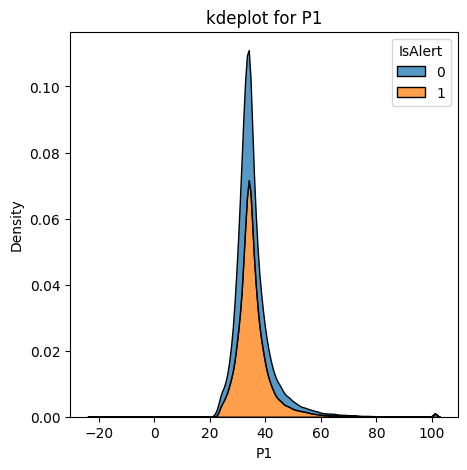

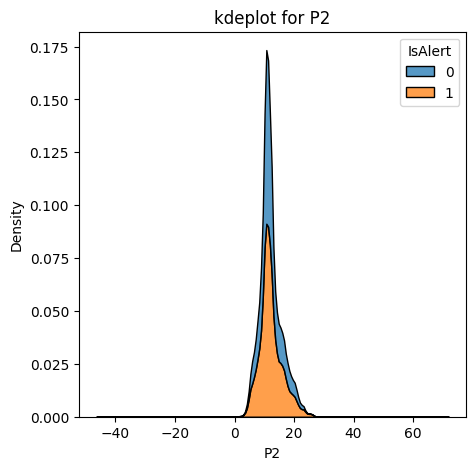

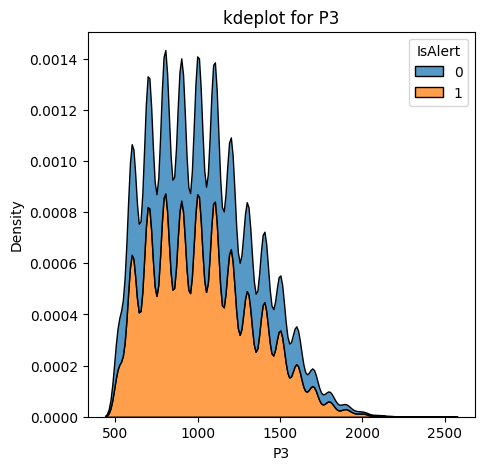

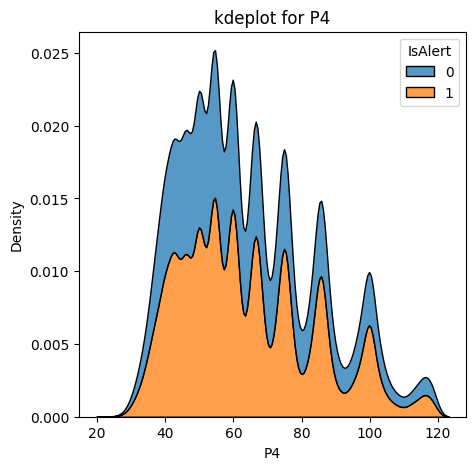

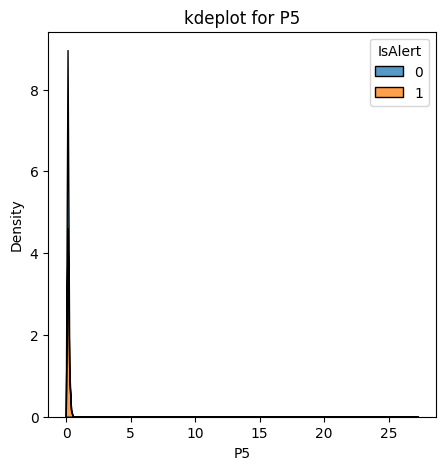

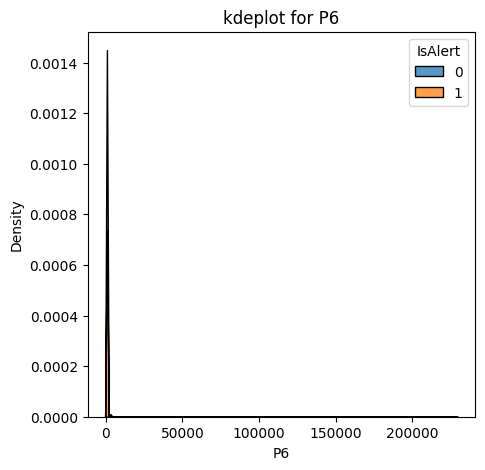

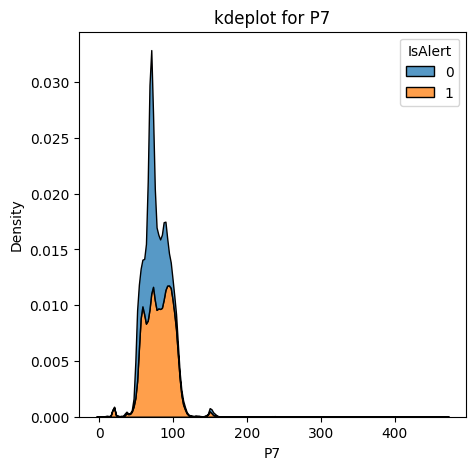

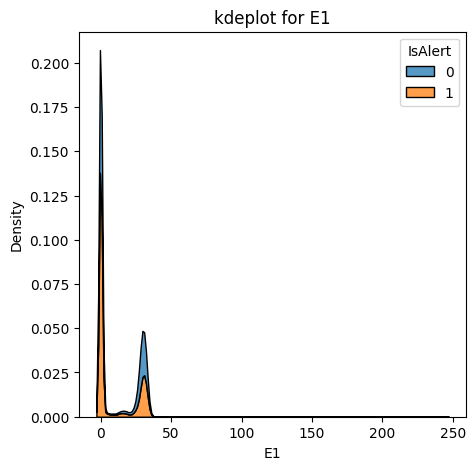

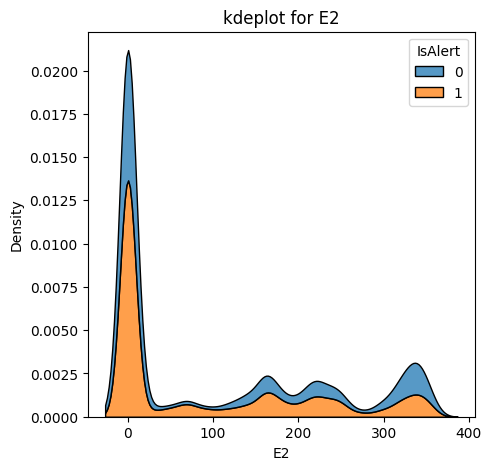

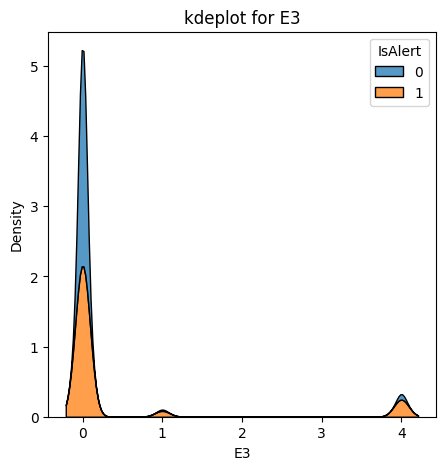

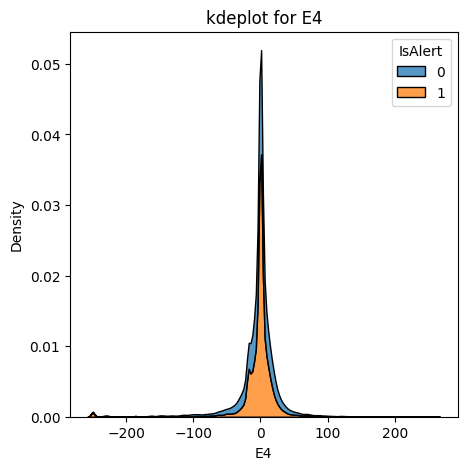

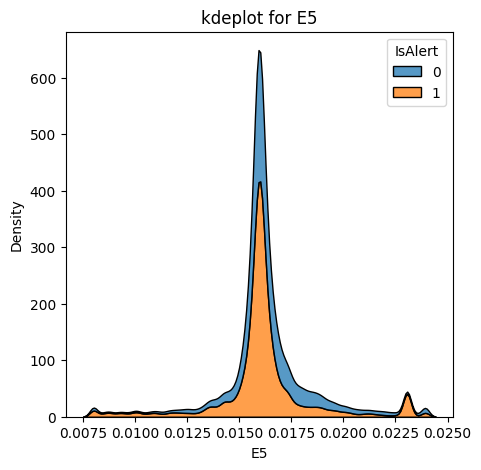

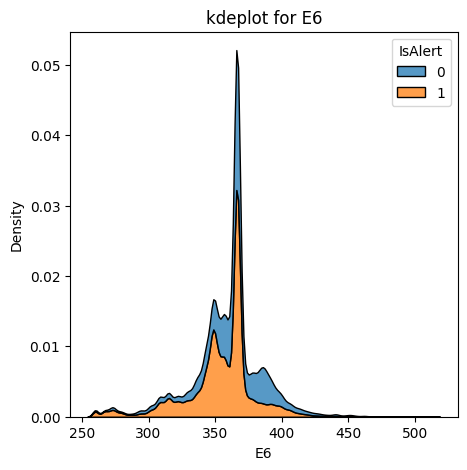

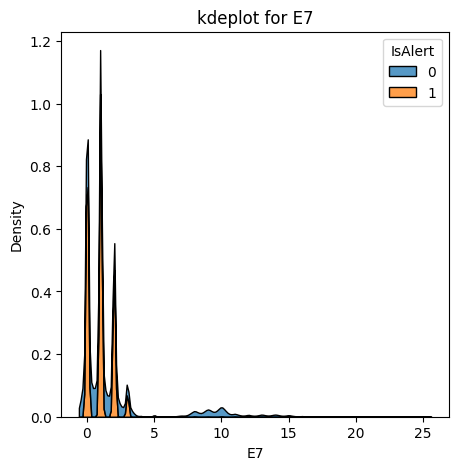

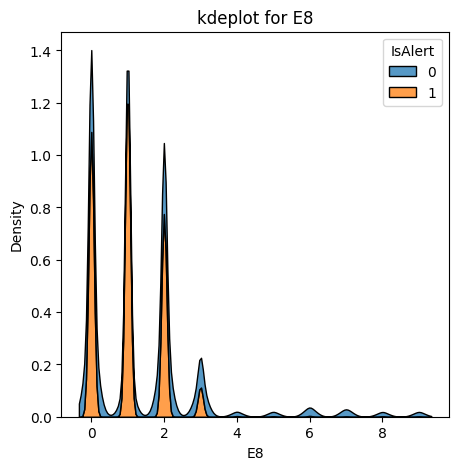

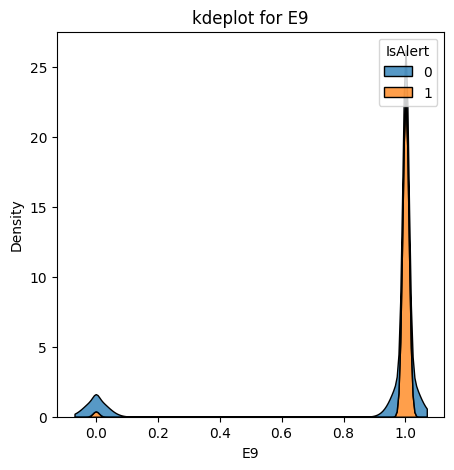

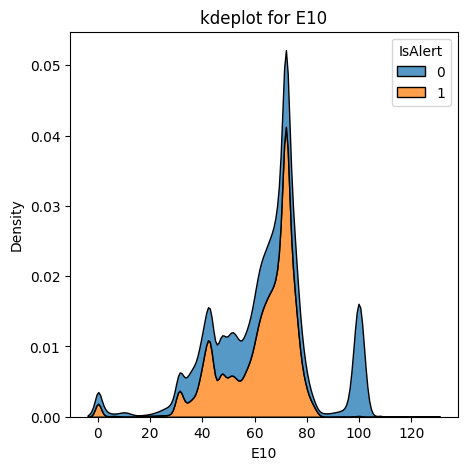

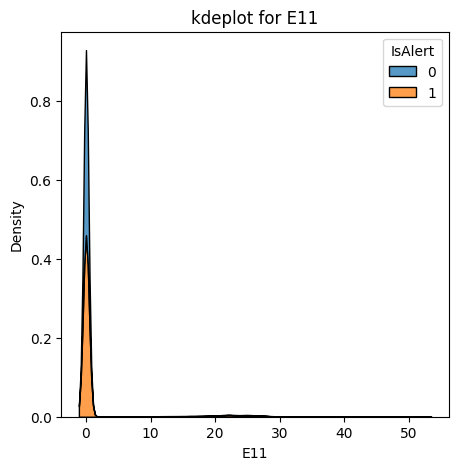

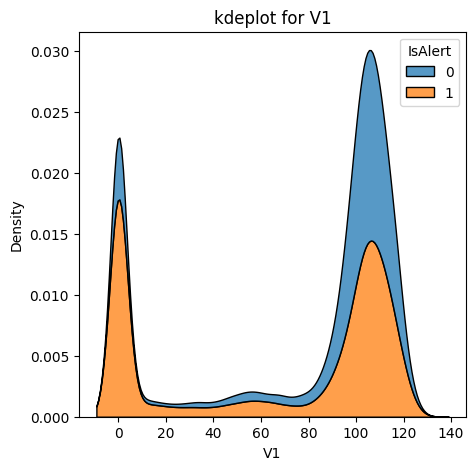

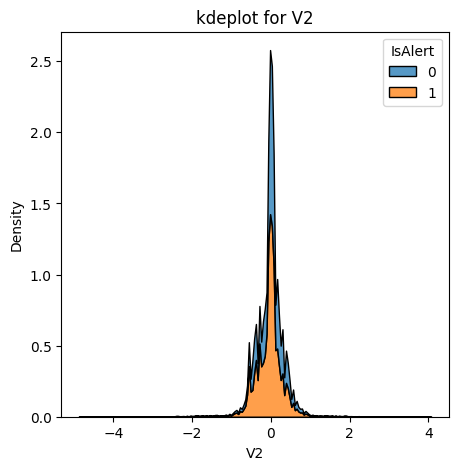

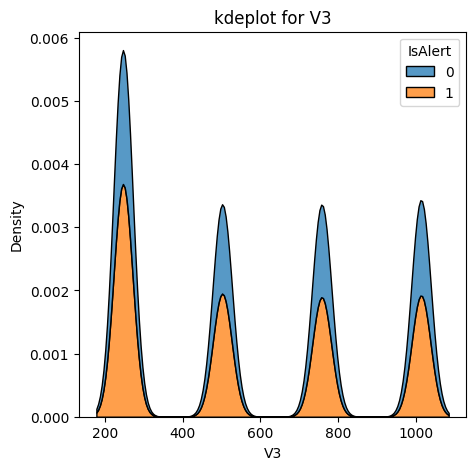

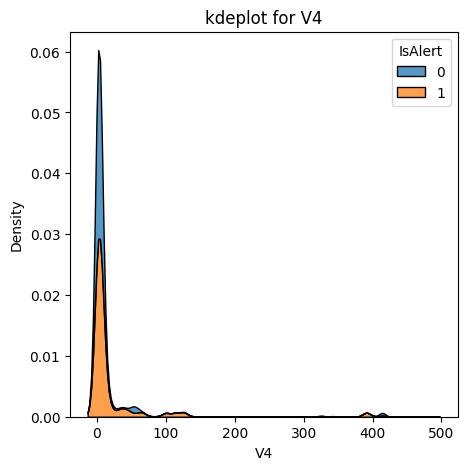

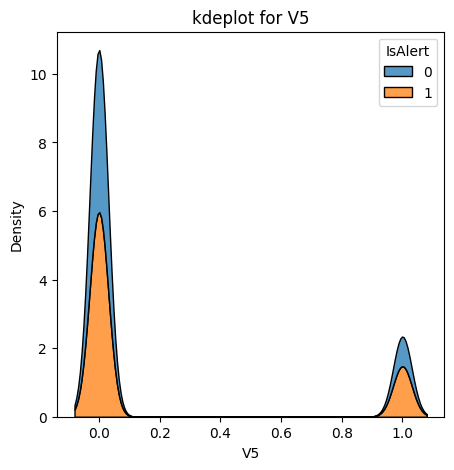

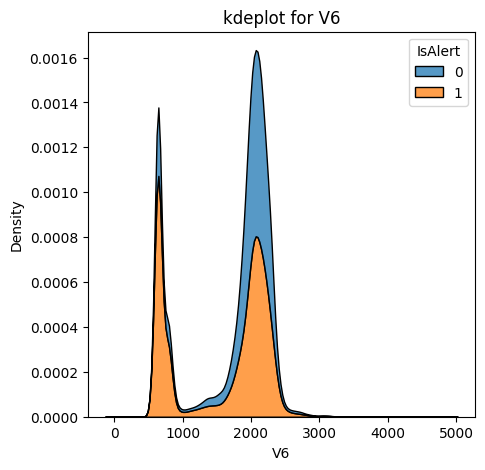

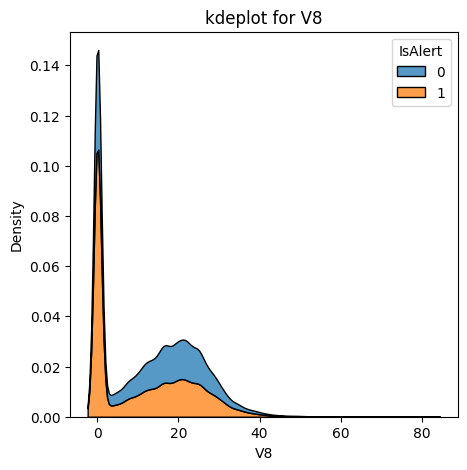

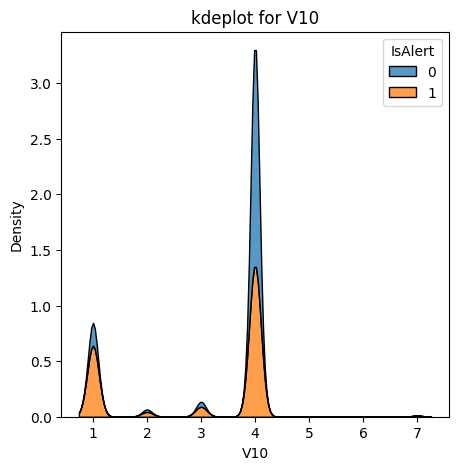

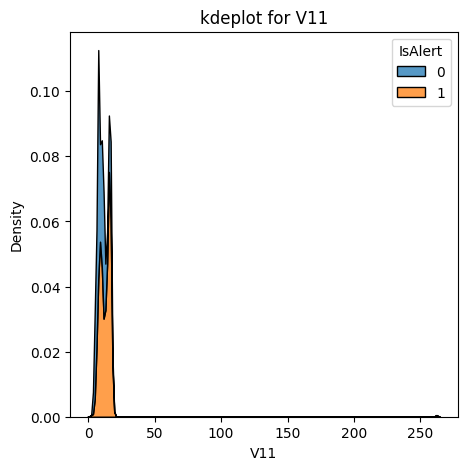

In [10]:
for i in train.columns:
  if i not in ['TrialID' , 'ObsNum' , 'IsAlert', 'P8', 'V7' , 'V9']:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data=train , x= i , hue='IsAlert' , multiple='stack')
    plt.title(f"kdeplot for {i}")
  else:
    continue

## Uni-Variate Analysis

In [11]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


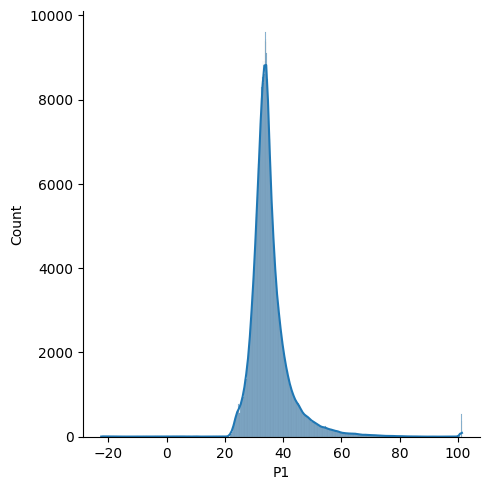

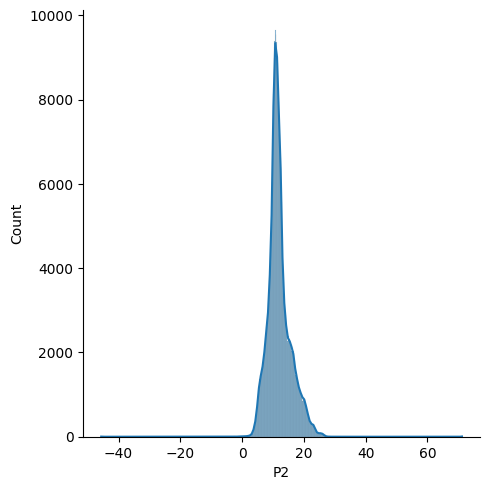

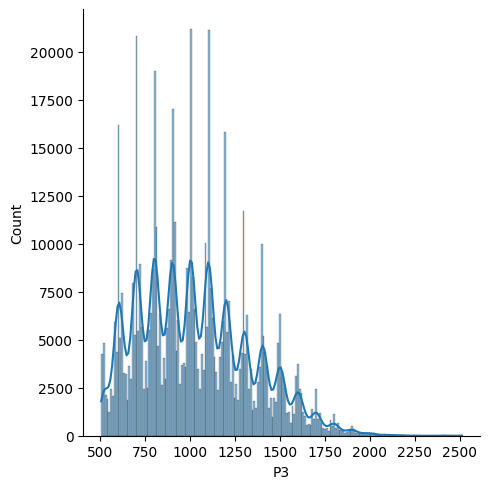

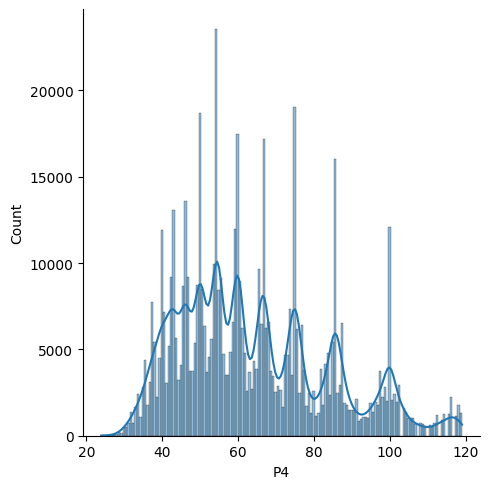

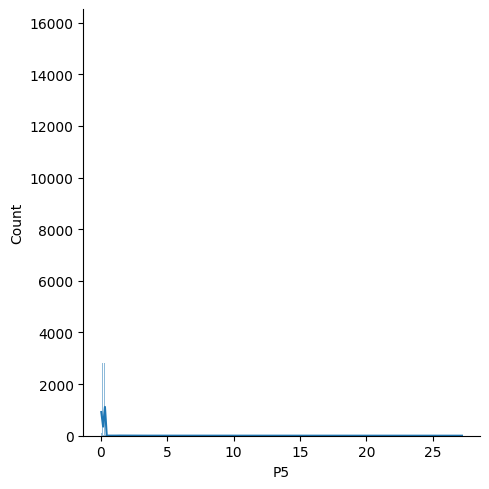

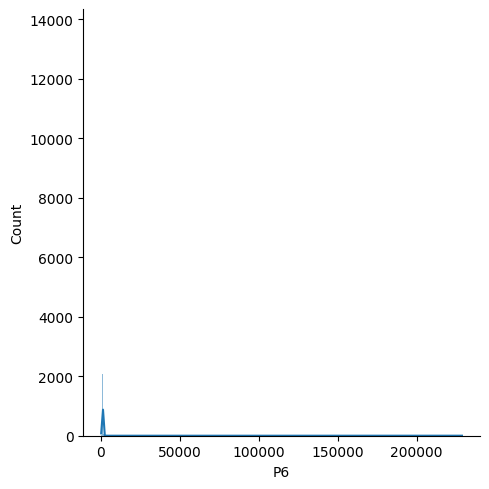

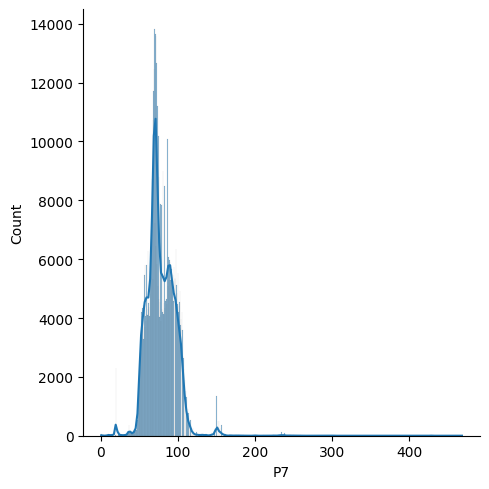

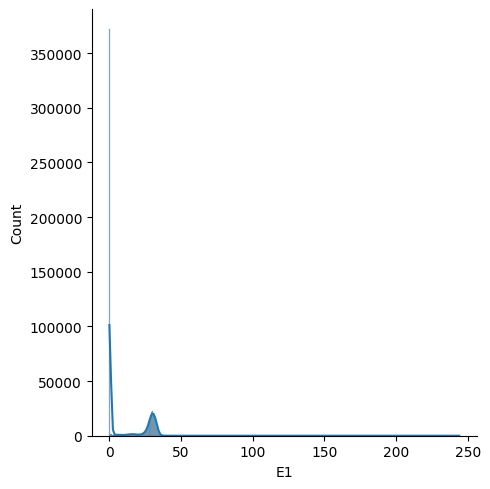

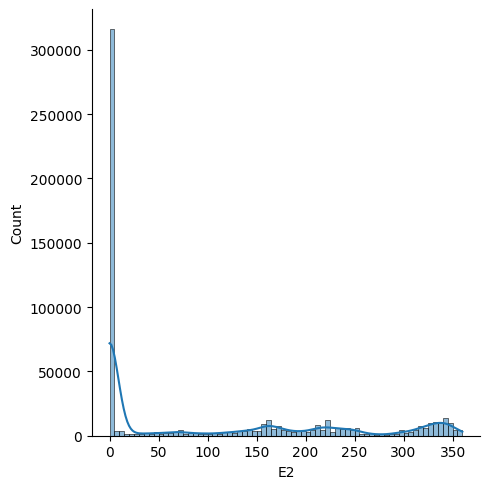

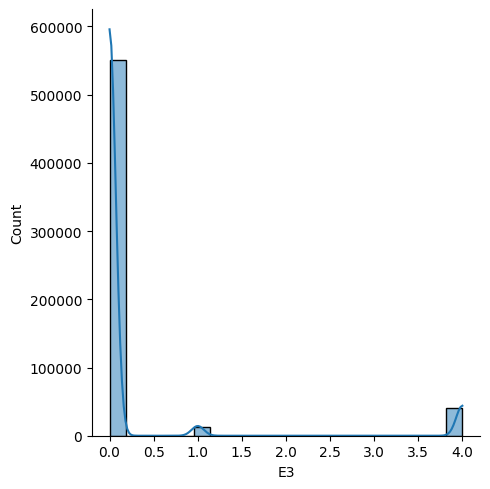

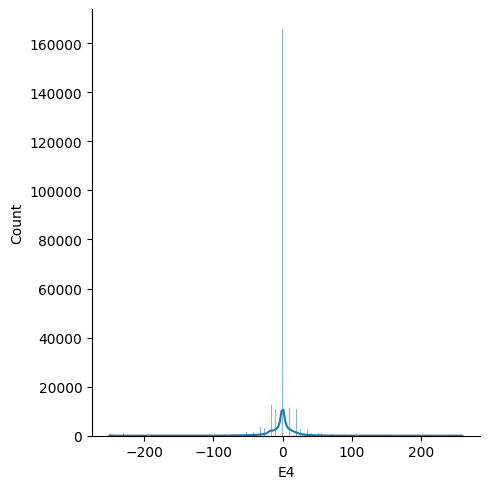

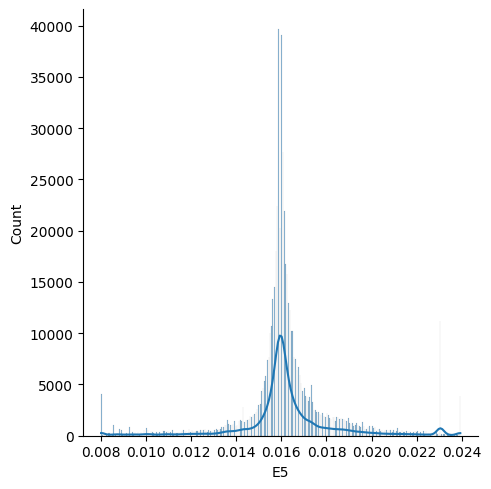

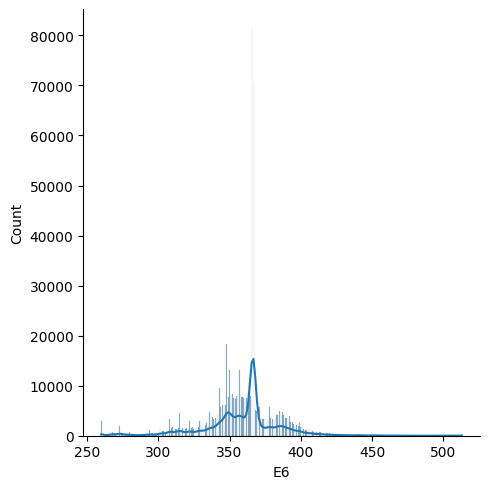

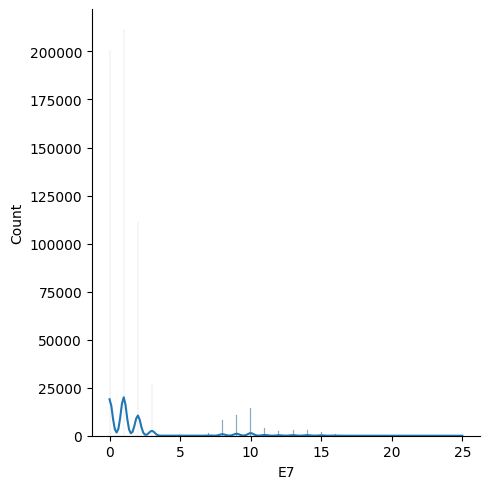

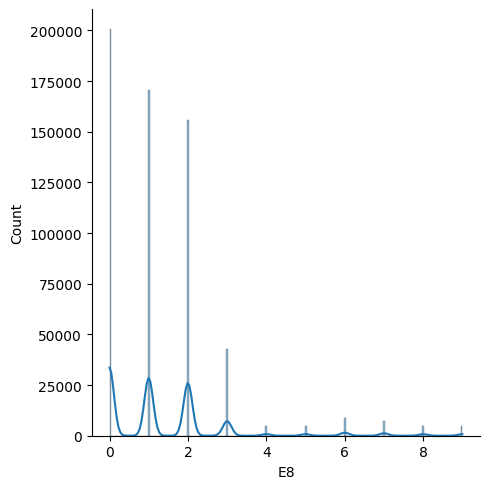

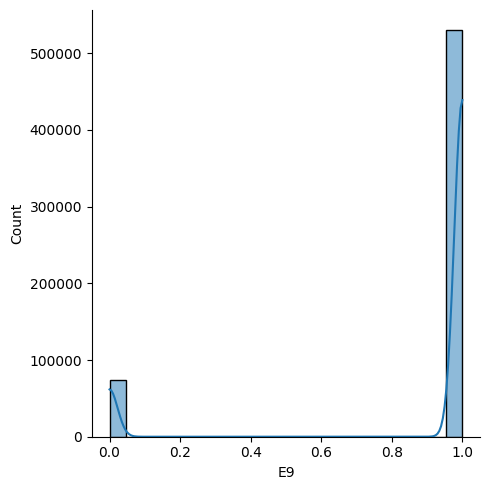

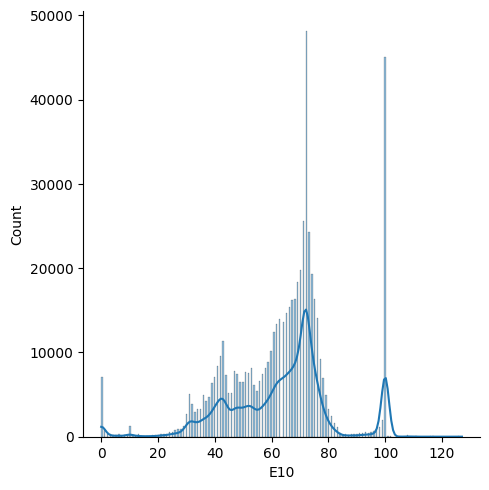

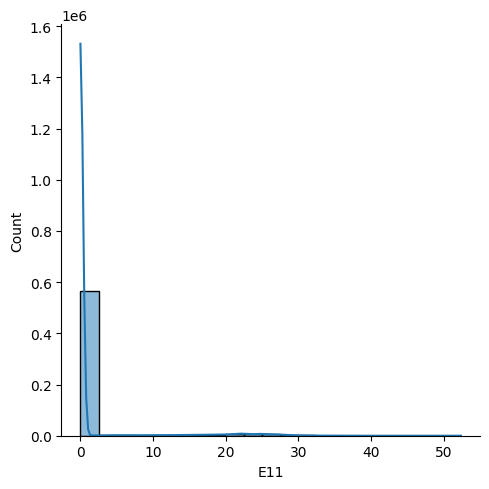

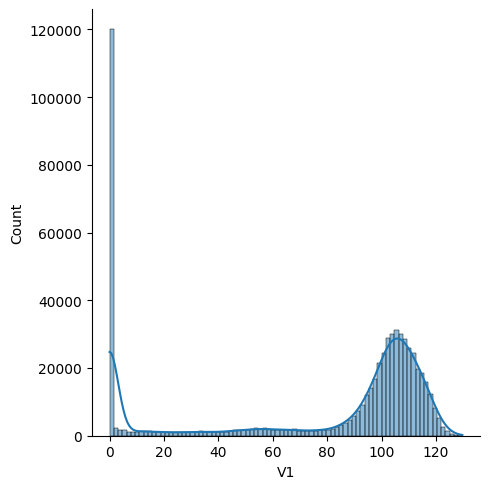

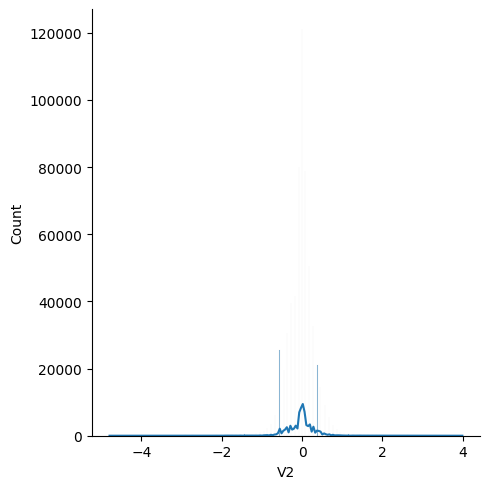

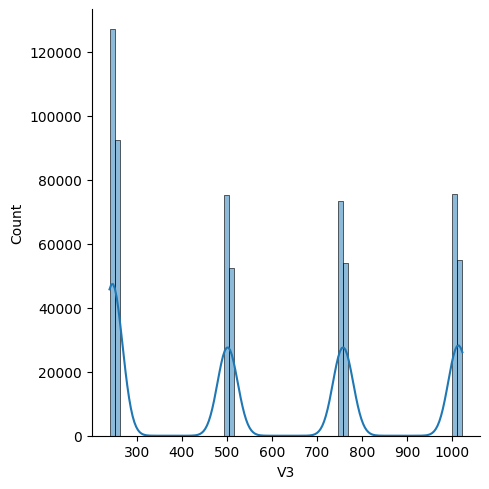

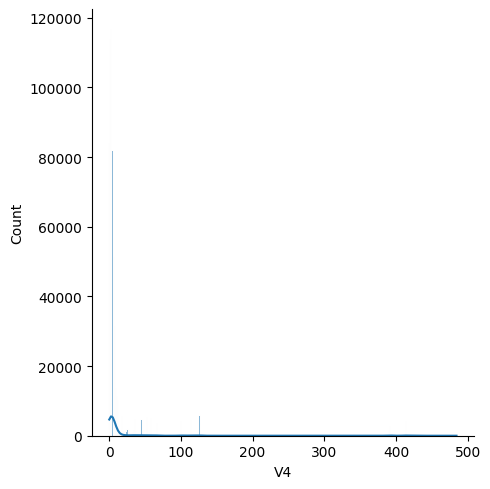

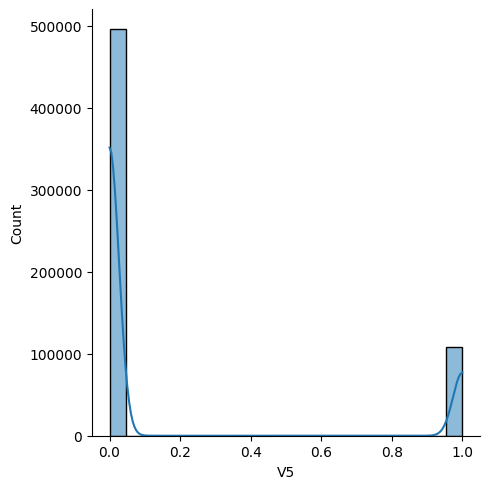

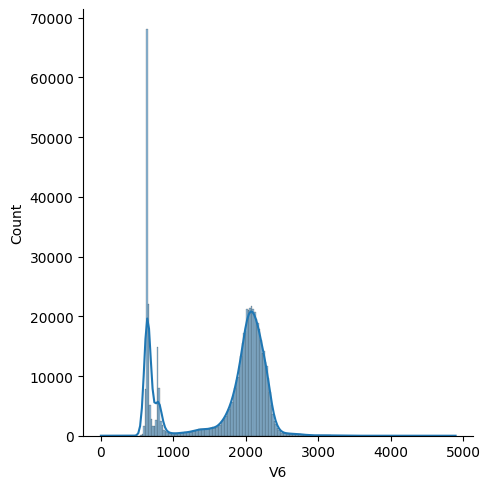

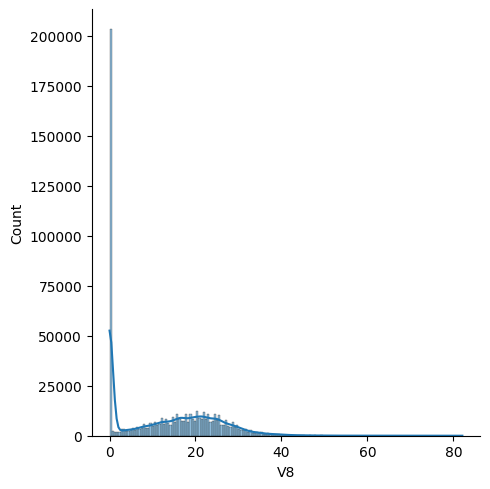

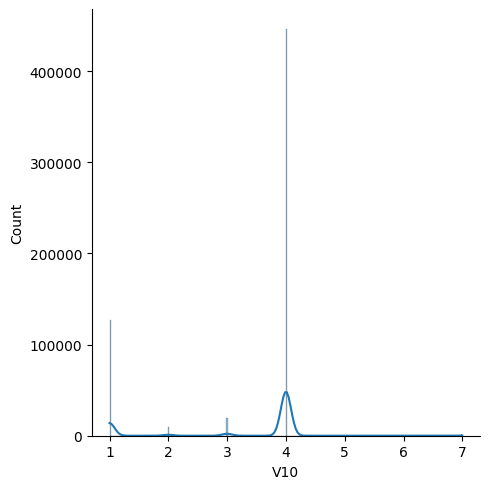

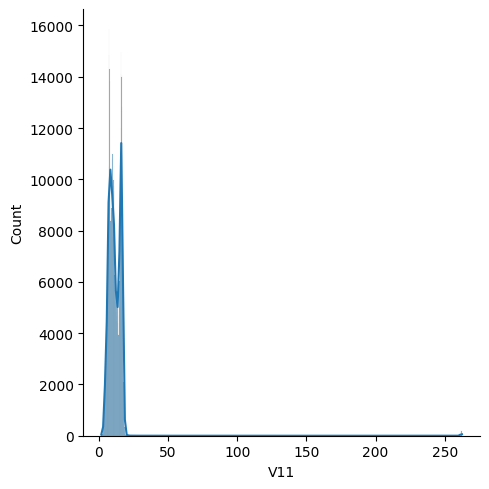

In [12]:
for i in train.columns:
  if i not in ['TrialID' , 'ObsNum' , 'IsAlert', 'P8', 'V7' , 'V9']:
    sns.displot(train[i] , kde = True)
  else:
    continue

## Bi-Variate Analysis


<Axes: >

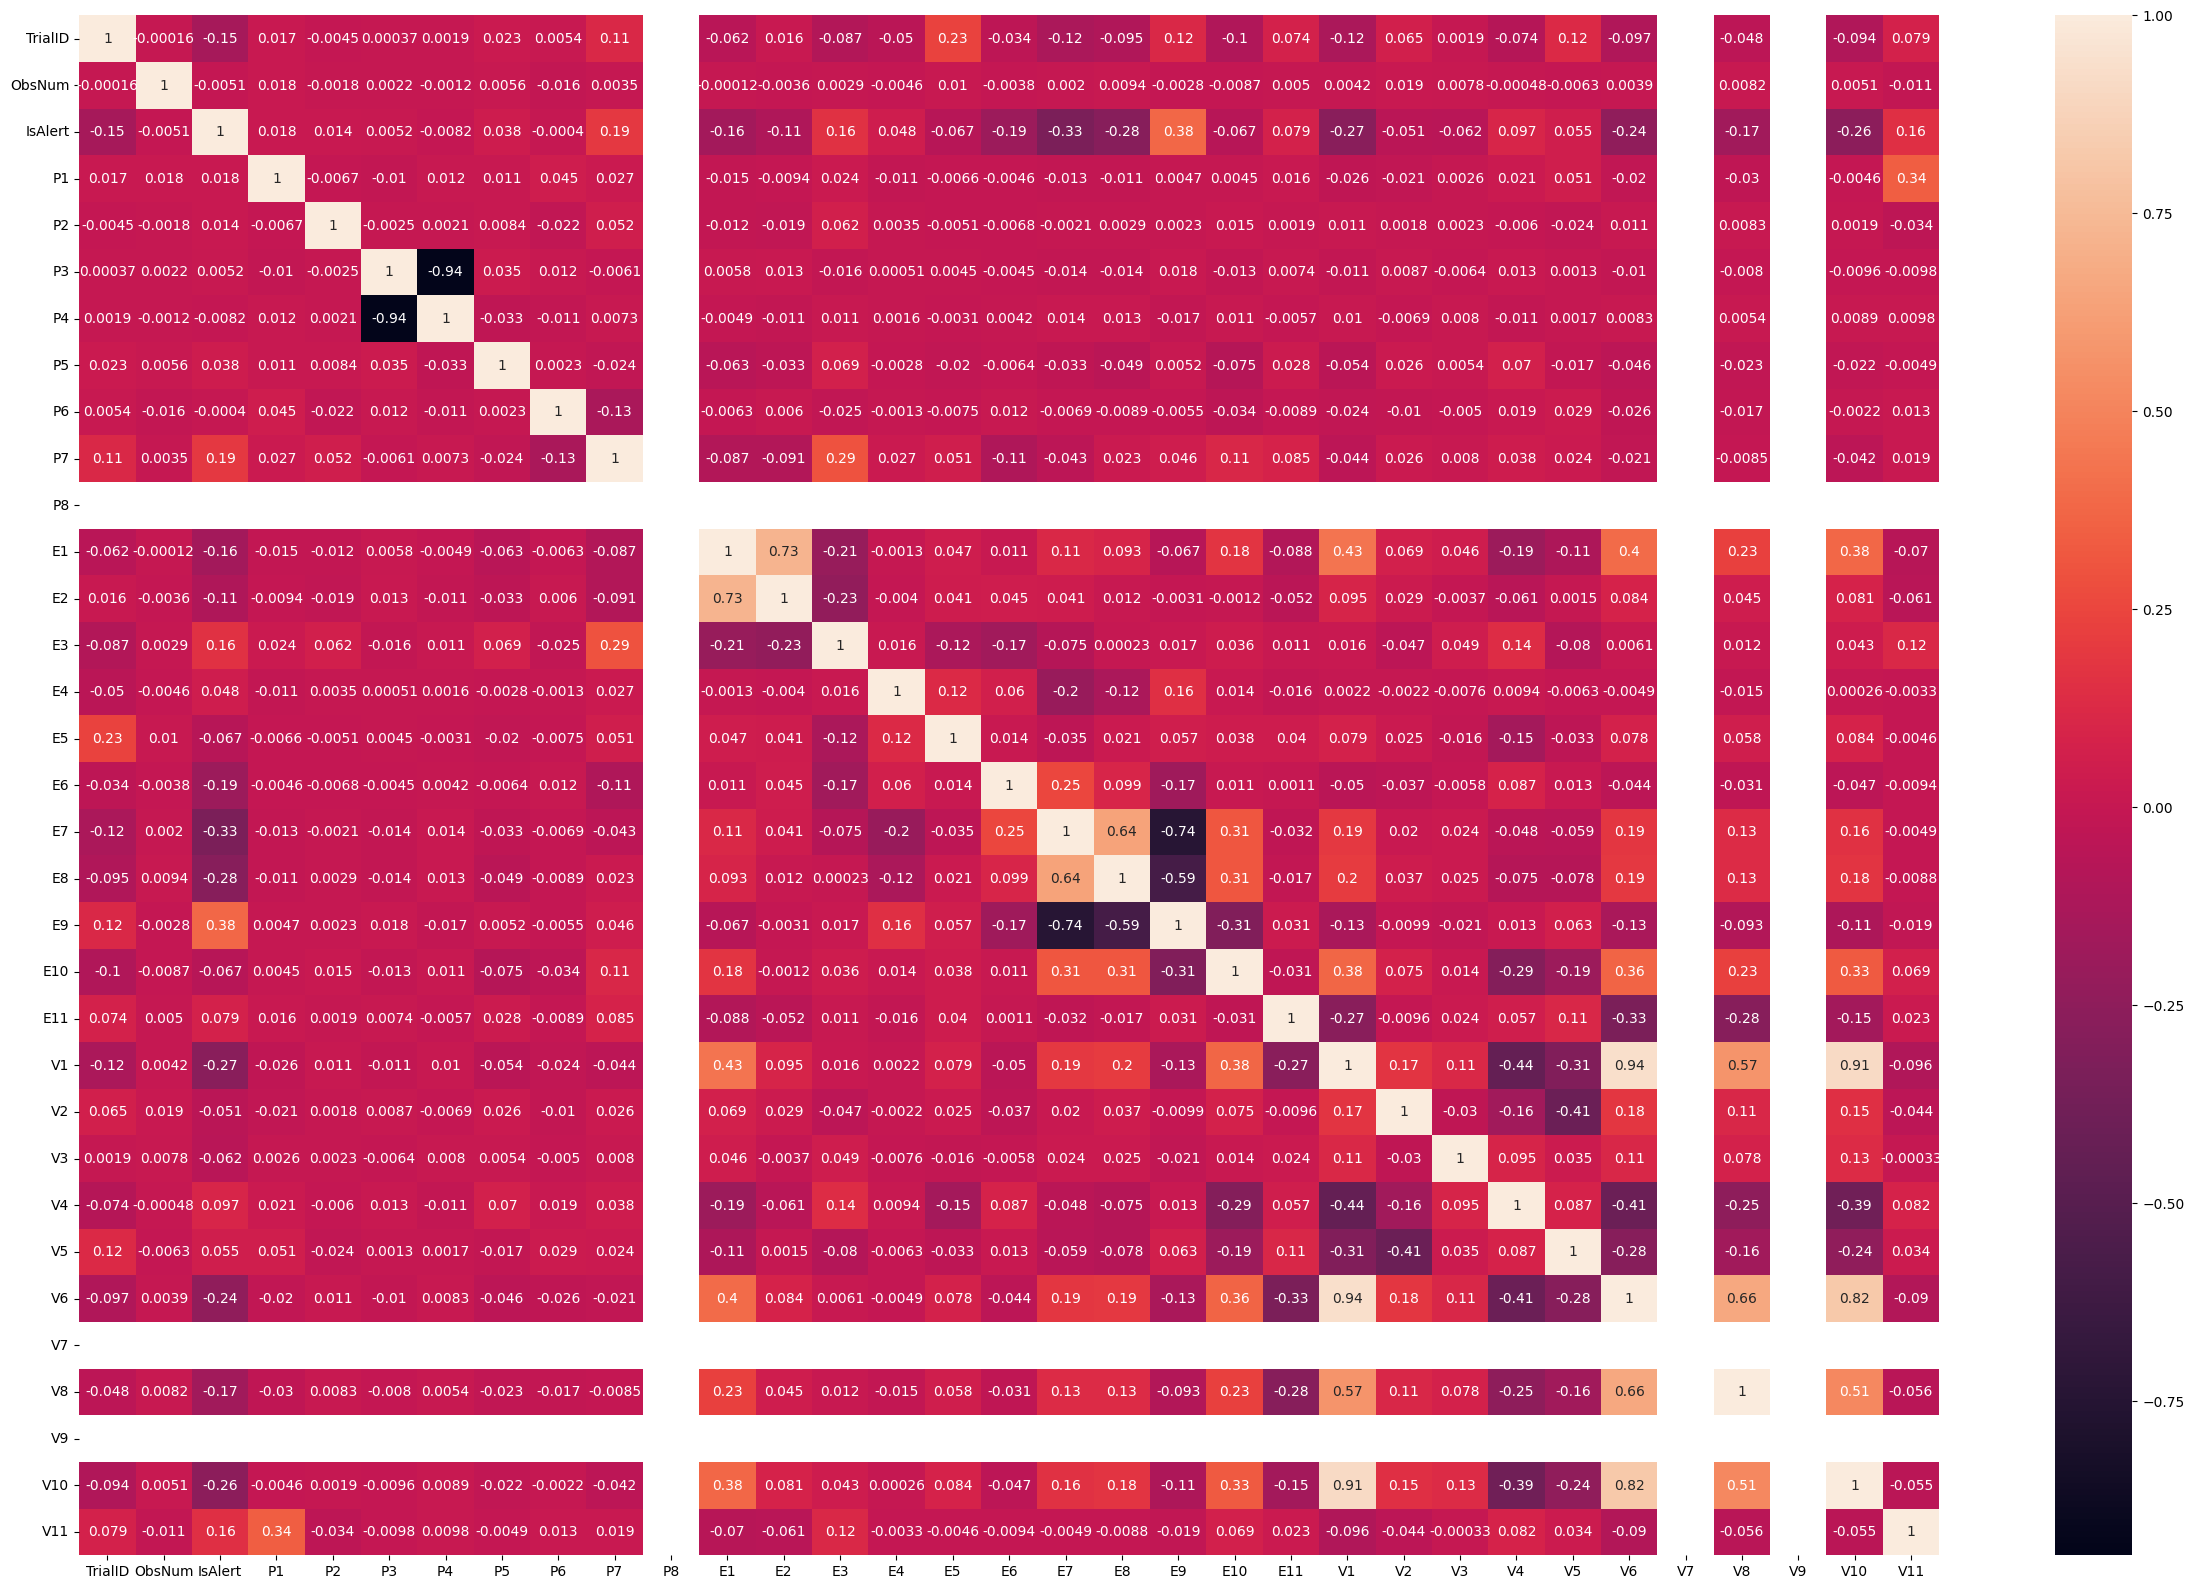

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),annot=True)

# Splitting Of Data

In [14]:
y = train['IsAlert']
x = train.iloc[: , 3:]

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 123)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


# Logistic Model

In [17]:
logreg = LogisticRegression(max_iter = 1000)
#Fit the Model
logreg.fit(x_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
y_hat_train_logreg = logreg.predict(x_train)
y_hat_test_logreg = logreg.predict(x_test)

In [19]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

In [20]:
model_eval(y_train , y_hat_train_logreg)

The Accuracy of the Model is: 0.75
[[138685  64642]
 [ 54175 225961]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [21]:
model_eval(y_test , y_hat_test_logreg)

The Accuracy of the Model is: 0.75
[[34935 16282]
 [13539 56110]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     51217
           1       0.78      0.81      0.79     69649

    accuracy                           0.75    120866
   macro avg       0.75      0.74      0.75    120866
weighted avg       0.75      0.75      0.75    120866



# Decision Tree

In [22]:
dtree = DecisionTreeClassifier()

#Fit the Model
dtree.fit(x_train , y_train)

DecisionTreeClassifier()

In [23]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [24]:
model_eval(y_train , y_hat_train_dtree)

The Accuracy of the Model is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [25]:
model_eval(y_test , y_hat_test_dtree)

The Accuracy of the Model is: 0.99
[[50473   744]
 [  800 68849]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# Random Forest

In [26]:
rf = RandomForestClassifier()

#Fit the Model
rf.fit(x_train , y_train)

RandomForestClassifier()

In [27]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [28]:
model_eval(y_train , y_hat_train_rf)

The Accuracy of the Model is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [29]:
model_eval(y_test , y_hat_test_rf)

The Accuracy of the Model is: 0.99
[[50689   528]
 [   85 69564]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# Ada Boost

In [30]:
ada = AdaBoostClassifier(n_estimators = 100)

ada.fit(x_train , y_train)

AdaBoostClassifier(n_estimators=100)

In [31]:
y_hat_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [32]:
model_eval(y_train , y_hat_train_ada)

The Accuracy of the Model is: 0.86
[[160509  42818]
 [ 24340 255796]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [33]:
model_eval(y_test , y_hat_test_ada)

The Accuracy of the Model is: 0.86
[[40521 10696]
 [ 5929 63720]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     51217
           1       0.86      0.91      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.86    120866
weighted avg       0.86      0.86      0.86    120866



# Gradient Boosting

In [34]:
gb = GradientBoostingClassifier(n_estimators = 150)

gb.fit(x_train , y_train)

GradientBoostingClassifier(n_estimators=150)

In [35]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [36]:
model_eval(y_train , y_hat_train_gb)

The Accuracy of the Model is: 0.9
[[168085  35242]
 [ 14131 266005]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [37]:
model_eval(y_test , y_hat_test_gb)

The Accuracy of the Model is: 0.9
[[42318  8899]
 [ 3449 66200]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



# XG Boost

In [38]:
xgb = XGBClassifier(n_estimators = 150)
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [40]:
model_eval(y_train , y_hat_train_xgb)

The Accuracy of the Model is: 0.96
[[189097  14230]
 [  2786 277350]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    203327
           1       0.95      0.99      0.97    280136

    accuracy                           0.96    483463
   macro avg       0.97      0.96      0.96    483463
weighted avg       0.97      0.96      0.96    483463



In [41]:
model_eval(y_test , y_hat_test_xgb)

The Accuracy of the Model is: 0.96
[[47464  3753]
 [  792 68857]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     51217
           1       0.95      0.99      0.97     69649

    accuracy                           0.96    120866
   macro avg       0.97      0.96      0.96    120866
weighted avg       0.96      0.96      0.96    120866



# Best Model

In [42]:
accuracy_table=[['Logistic Regression',round(accuracy_score(y_test , y_hat_test_logreg),2)],
 ['Decision Tree ', round(accuracy_score(y_test , y_hat_test_dtree),2)],
  ['Random Forest' , round(accuracy_score(y_test , y_hat_test_rf))],
  ['Ada Boosting' , round(accuracy_score(y_test , y_hat_test_ada))],
  ['Gradient Boosting' , round(accuracy_score(y_test , y_hat_test_gb))],
  ['XG Boosting' , round(accuracy_score(y_test , y_hat_test_xgb))]]
df1 = pd.DataFrame(accuracy_table, columns = ['Model','Test_Accuracy'])
print(df1)

                 Model  Test_Accuracy
0  Logistic Regression           0.75
1       Decision Tree            0.99
2        Random Forest           1.00
3         Ada Boosting           1.00
4    Gradient Boosting           1.00
5          XG Boosting           1.00


<Axes: >

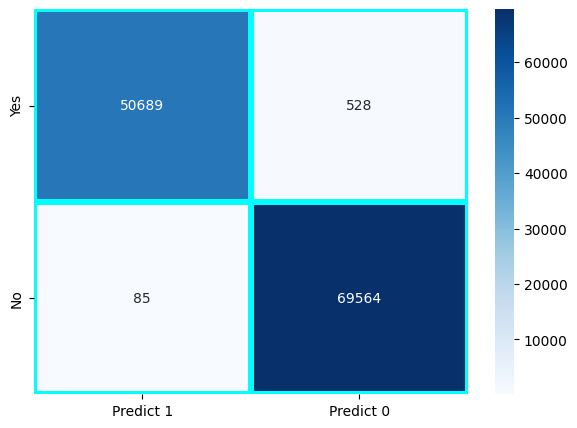

In [43]:
confu_metrics = metrics.confusion_matrix(y_test,y_hat_test_rf)

df_cm = pd.DataFrame(confu_metrics, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g' , cmap = 'Blues' ,linewidths = 3 , linecolor = 'cyan')

# Application on Test Dataset

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [45]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [46]:
x_variable = test.iloc[: , 3:]

In [47]:
test['IsAlert'] = rf.predict(x_variable)

In [48]:
test['IsAlert'].head()

0    1
1    1
2    1
3    1
4    1
Name: IsAlert, dtype: int64

# Comparing With Solution Set

In [49]:
solution = pd.read_csv('/content/Solution.csv')

In [50]:
solution.head()

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private


In [51]:
comparison = solution['Prediction'] == test['IsAlert']

In [52]:
print(comparison)

0         True
1         True
2         True
3         True
4         True
          ... 
120835    True
120836    True
120837    True
120838    True
120839    True
Length: 120840, dtype: bool
